# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [2]:
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/Lab 4/data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Diving the data into features and labels (X and y)

In [3]:
X = df.drop('Class',axis=1)
y = df['Class']

Splitting the data into train and test parts

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [5]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier


# Define the RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

n_estimators_values = [1,2,3,4,5,6,7,8,9,10,20,30]

# Define the parameter grid
param_grid = {
    'n_estimators': [10,20,21,22,23,24,25,26,27,28,29,30,40,50],  # Number of trees
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'criterion': ['gini', 'entropy']  # Splitting criterion
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

Best Parameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 21}
Best Accuracy: 0.996875


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



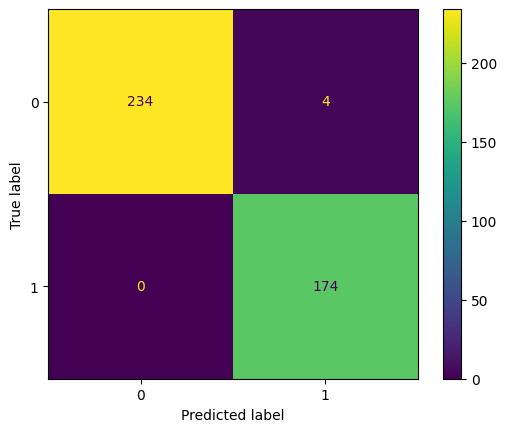

In [18]:
model = RandomForestClassifier(n_estimators=30,max_features='auto',random_state=101)
model.fit(X_train,y_train)
preds = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Compute Confusion Matrix
cm = confusion_matrix(y_test, preds)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Print Classification Report
print(classification_report(y_test, preds))

Evaluate the model by displaying a confusion matrix and a classification report 

In [6]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

confusion_matrix(y_test,y_pred)


array([[234,   4],
       [  0, 174]], dtype=int64)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


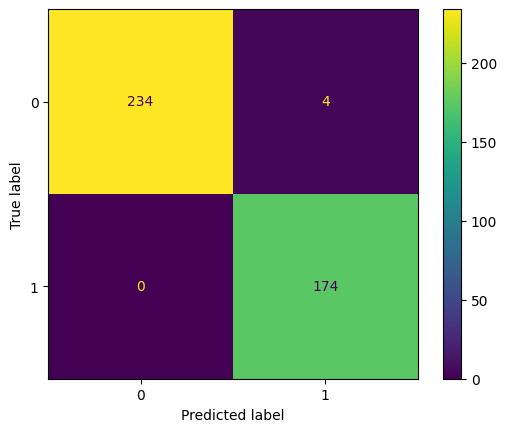

In [7]:
plot_confusion_matrix(grid_search,X_test,y_test)

In [8]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

